# Introduction to Principal Component Analysis

Principal Component Analysis (PCA) is considered as one of the most popular technique for linearly independent feature extractiond and dimensionality reduction. We sometimes have machine learning problems in which input features have very high dimensions, which complicates machine learning, increasing processing and reducing accuracy.

Our first task is to reduce high dimensional input feature space, to a lower dimensional space which is more effective in machine learning task. PCA has several benefits including data compression, improved visualization, increasing performance, simplifying machine learning models etc.

Reducing dimensionality of input feature space while retaining most of the variability of the data is only one possible use for PCA. Reconstructing the the original data through back projection technique can also be achieved. 

In [5]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

# Importance of Feature Scaling

Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the weight axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

Reference : http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline



# Load the sample data
features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
norm_pred_accuracy = metrics.accuracy_score(y_test, pred_test)
std_pred_accuracy = metrics.accuracy_score(y_test, pred_test_std)
print(f'Prediction accuracy for the normal test dataset with PCA: {norm_pred_accuracy}')
print(f'Prediction accuracy for the standardized test dataset with PCA: {std_pred_accuracy}')

Prediction accuracy for the normal test dataset with PCA: 0.8148148148148148

Prediction accuracy for the standardized test dataset with PCA: 0.9814814814814815


# Visualize PCA Components with Scaling

The figures below show the 1st and 2nd PCA components with the original data set and then with the scaled (standardized) data set

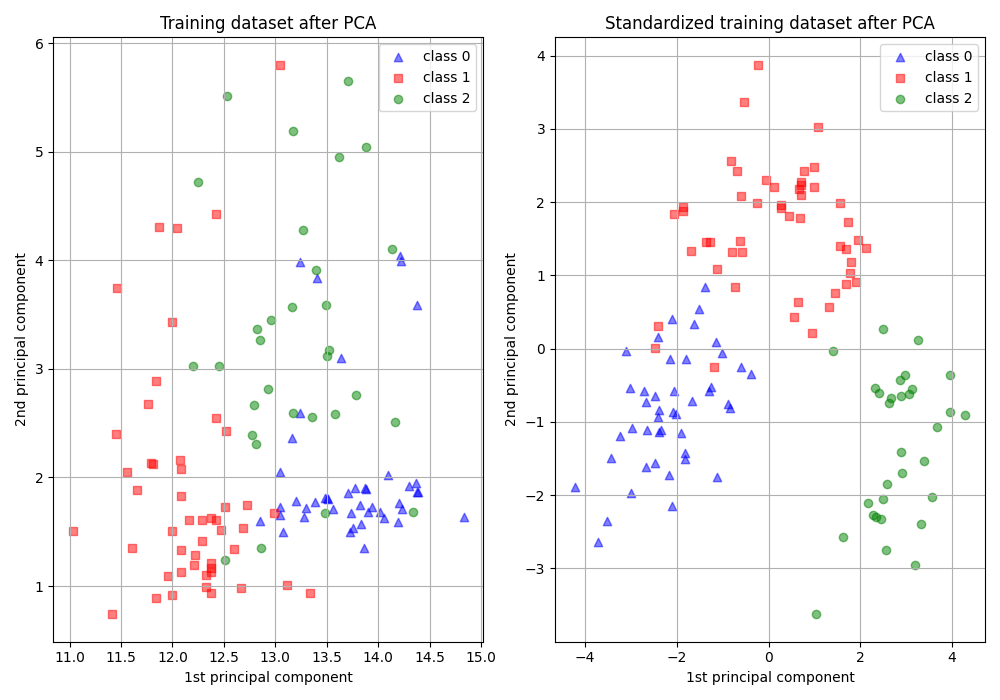

In [16]:
import matplotlib.pyplot as plt

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# Visualize original vs standarized dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()
plt.show()

# Correlated Data in Nature

You are given an arrayÂ grainsÂ giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

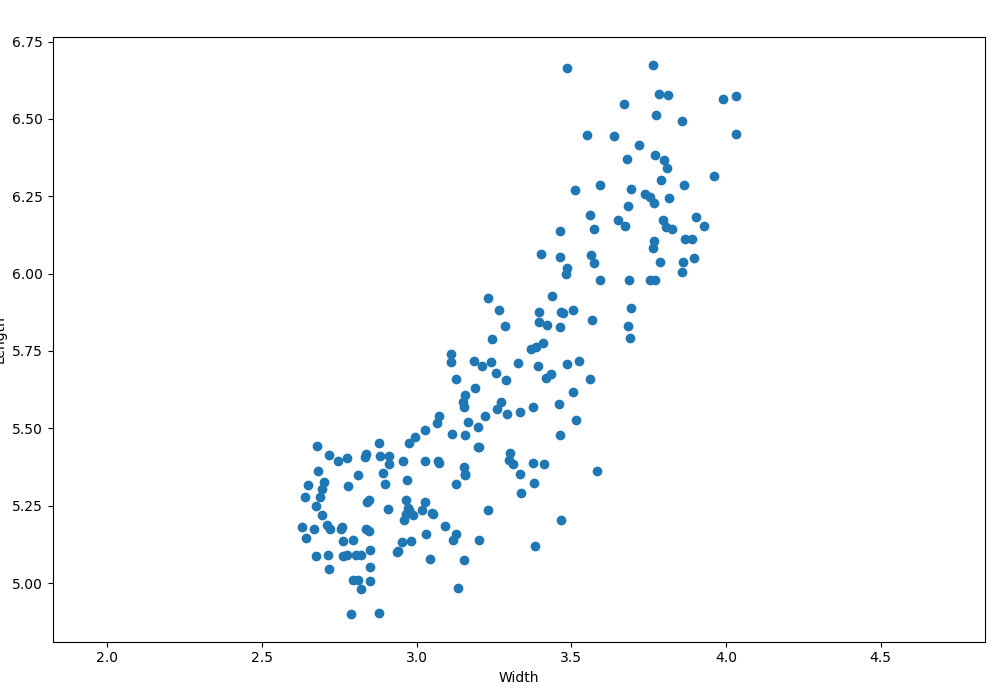

Pearson correlation: 0.8604405325922295


In [20]:
# Perform the necessary imports
import io
from scipy.stats import pearsonr

# Load the CSV data
from js import fetch
res = await fetch('https://jupyterlite.anaconda.cloud/b0df9a1c-3954-4c78-96e6-07ab473bea1a/files/pca-examples/seeds-width-vs-length.csv')
csv_data = await res.text()
grains = pd.read_csv(io.StringIO(csv_data))

# Assign the 0th column of grains: width
width = grains.iloc[:,0]

# Assign the 1st column of grains: length
length = grains.iloc[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.xlabel('Width')
plt.ylabel('Length')
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(f'Pearson correlation: {correlation}')

# De-Correlating the Feature Measurements with PCA

You observed in the previous exercise that the width and length measurements of the grain are correlated. 
Now, you will use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

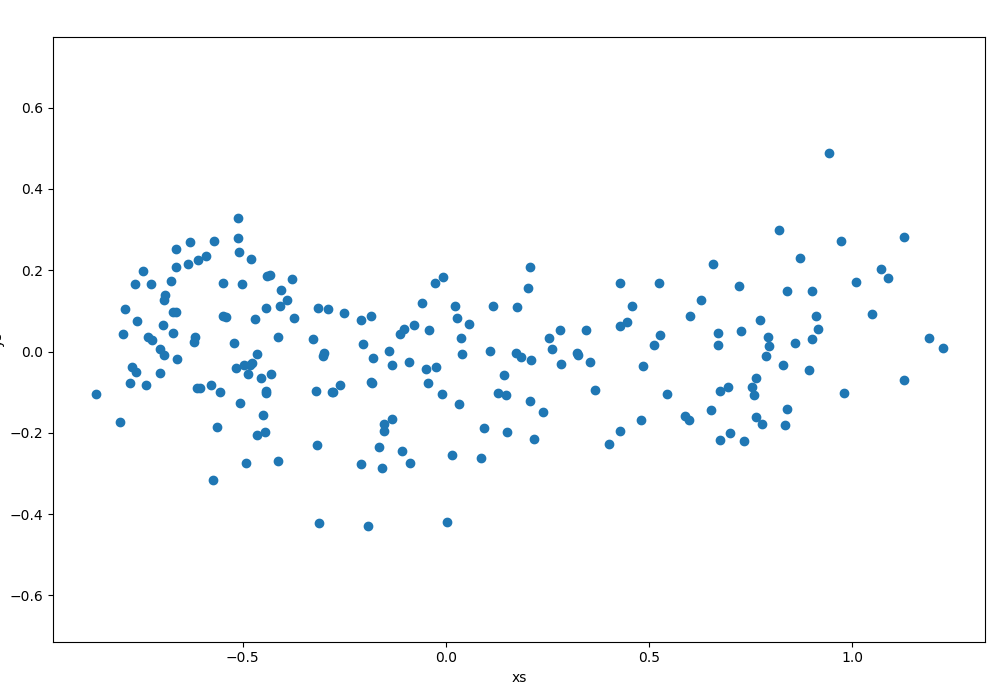

Pearson correlation: -2.4924352337832772e-17


In [22]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.xlabel('xs')
plt.ylabel('ys')
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(f'Pearson correlation: {correlation}')

# Analyzing First Principal Component

The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grains gives the length and width of the grain samples. PyPlot (plt) andÂ PCA have already been imported for you.

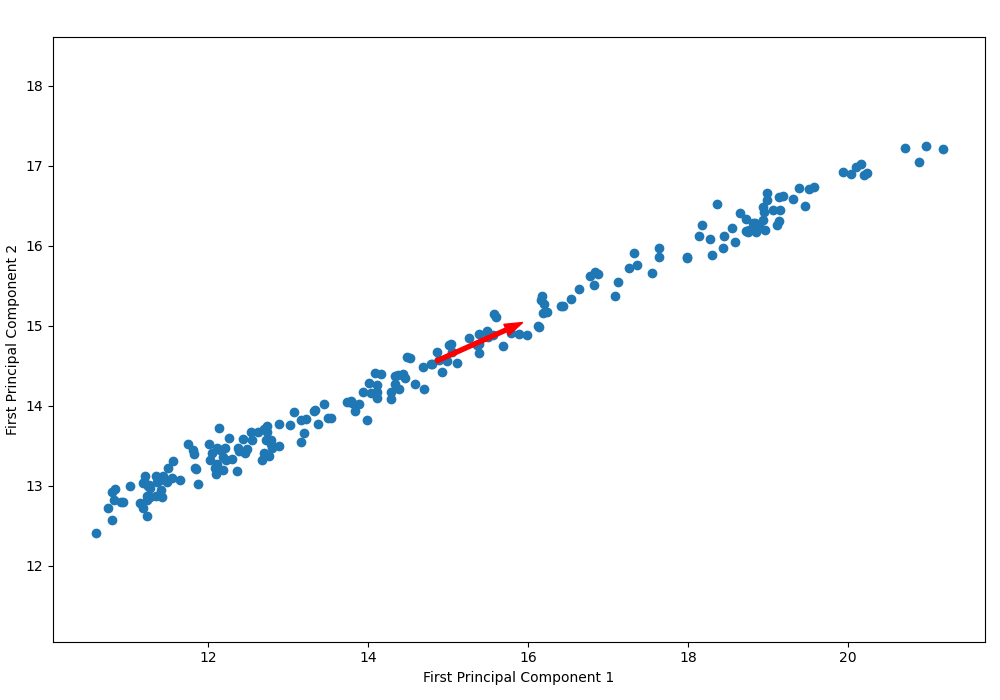

In [37]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.iloc[:,0], grains.iloc[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.05)

# Keep axes on same scale
plt.axis('equal')
plt.xlabel('First Principal Component 1')
plt.ylabel('First Principal Component 2')
plt.show()

# Feature Selection by Analyzing Variance of the PCA Features

The seed dataset is multi-dimensional. But what is itsÂ intrinsicÂ dimension? Make a plot of the variances of the PCA features to find out. As before,Â samplesÂ is a 2D array, where each row represents a crop. You'll need to standardize the features first.


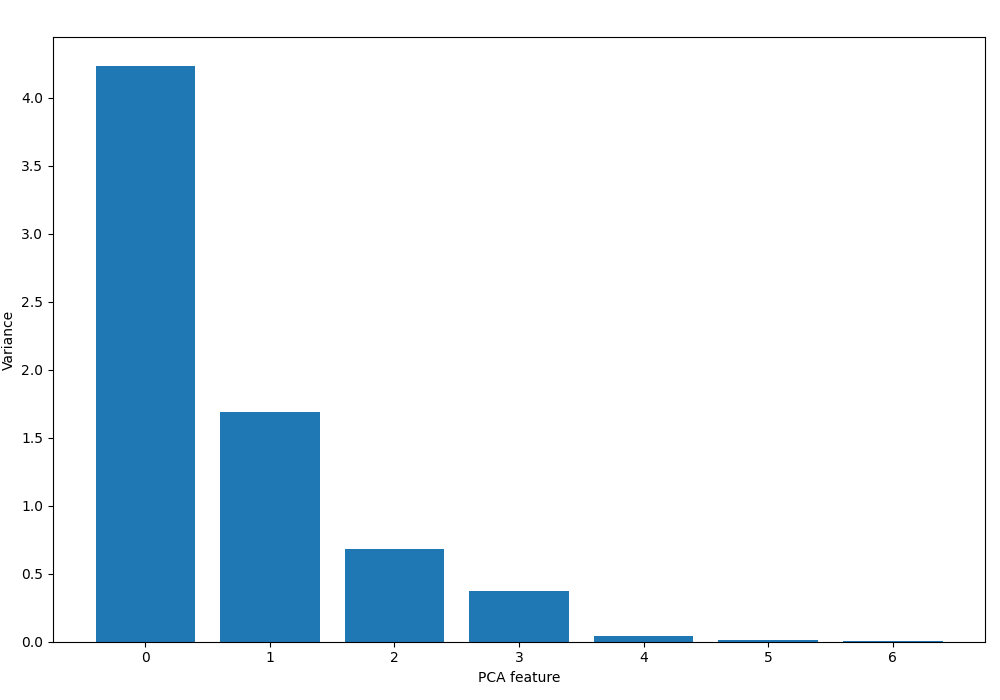

In [39]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


# Load the CSV data
from js import fetch
res = await fetch('https://jupyterlite.anaconda.cloud/b0df9a1c-3954-4c78-96e6-07ab473bea1a/files/pca-examples/seeds.csv')
csv_data = await res.text()
grains = pd.read_csv(io.StringIO(csv_data))
samples = grains.iloc[:,1:]

# Preprocessing : Changing type of last column from int to float
s1=samples.iloc[:,-1]
s1=s1.astype(float)
samples.iloc[:,-1] = s1

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

# Dimensionsionality Reduction of the Seed Measurements

In a previous exercise, you saw that was a reasonable choice for the "intrinsic dimension" of the seed measurements. Now use PCA for dimensionality reduction of the seed measurements, retaining only the 4 most important components.

In [44]:
# Import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scaled samples
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)


# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(f'Scaled samples:\n{scaled_samples[1:5,:]}\n')
print(f'PCA features shape:\n{pca_features.shape}\n')
print(f'PCA Features:\n{pca_features[1:10,:]}\n')

Scaled samples:

[[-0.35835326  1.43894519 -0.76053339  0.20823799 -0.67216102 -1.18860657

  -1.23210076]

 [-0.47322416  1.03690395 -0.68603546  0.31943844 -0.9654836  -1.22931428

  -1.23210076]

 [ 0.33087218  1.37123298  0.06797382  0.80395471 -1.56812819 -0.47622172

  -1.23210076]

 [-0.26645653  1.0199759  -0.54606967  0.14204724 -0.83015523 -0.9219711

  -1.23210076]]



PCA features shape:

(209, 2)



PCA Features:

[[-0.0186562   2.29716149]

 [-0.08414002  2.3355863 ]

 [ 1.37855131  2.17424425]

 [ 0.08621329  2.06637763]

 [ 0.17605665  1.09190549]

 [ 0.02140582  1.87962057]

 [ 1.92179746  0.66026183]

 [ 1.63787375  1.27952057]

 [ 0.26496896  0.39412473]]




# Conclusion

Here, I have shared several examples of PCA for dimensionality reduction and improving performance of machine learning algorithms.   While PCA does improve performance in many cases, but it is no silver bullet as pointed out by Andrew Ng, "Don't assume you need to do PCA. Try your full machine learning algorithm without PCA first. Then use PCA if you find that you need it.

Note : Some of the code examples have been taken from https://www.datacamp.com/home